# FiveThirtyEight Riddler: Marathon Running Buddies
https://fivethirtyeight.com/features/how-hard-is-it-to-find-a-running-buddy/

Extra credit!!!

### Import libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.stats import norm
from scipy.optimize import curve_fit
import pandas as pd
import time
%matplotlib inline

In [174]:
df = pd.read_csv('data/marathon_results_2015.csv')
df.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


In [175]:
df.columns

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')

In [176]:
time_cols=['5K', '10K', '15K', '20K', 'Half', '25K','30K', '35K', '40K', 'Pace', 'Official Time']
for col in time_cols:
    df[col+'_sec'] = pd.to_timedelta(df[col]).map(lambda x: x.seconds)
    df[col+'_sec'] = df[col+'_sec'].map(lambda x: x if x>0 else np.nan)

# convert bib number string to a number
def str2int(x):
    try:
        y = int(x)
    except:
        y = np.nan
    return y
df['Bib'] = df['Bib'].map(str2int)

# https://registration.baa.org/2015/cf/public/iframe_EntryLists.cfm
def wavefinder(b):
    if np.isnan(b) or b < 101: # these are the elites; should ignore for these purposes
        return 0
    if b > 101 and b < 7700:
        return 1
    if b > 8000 and b < 15600:
        return 2
    if b > 16000 and b < 23600:
        return 3
    if b > 24000 and b < 32500:
        return 4
    return 0

df['Wave'] = df['Bib'].map(wavefinder)

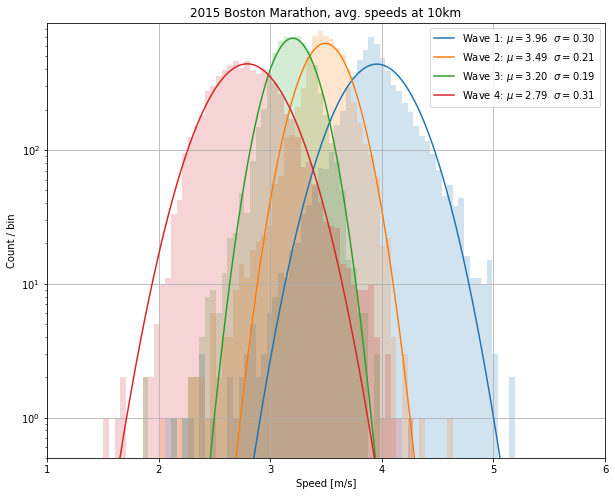

In [179]:
f, ax = plt.subplots(figsize=(10,8))
waves = [1,2,3,4]
y_max = []

color_norm = mpl.colors.BoundaryNorm(np.array([1,2,3,4,5]),4)
cmap = plt.cm.get_cmap('tab10')
#color_norm = mpl.colors.Normalize(vmin=1,vmax=4)
#cmap = plt.cm.get_cmap('viridis')

for idx,wave in enumerate(waves):
    speeds = (10000/df.loc[df['Wave']==wave,'10K_sec'])
    bins = np.linspace(1,6,100)
    binwidth = bins[1]-bins[0]
    speeds.hist(bins=bins, alpha=.2, color=cmap(color_norm(wave)))
    x = np.linspace(0,6,1000)
    #y = norm.pdf(x,loc=speeds.mean(),scale=speeds.std()) # method of moments
    loc,scale = norm.fit(speeds.dropna()) # MLEs
    y = norm.pdf(x,loc=loc,scale=scale)
    y_scale = y*speeds.count()*binwidth
    leg_txt = 'Wave %d: $\mu=$%.2f  $\sigma=$%.2f ' % (wave,loc,scale)
    ax.plot(x,y_scale,color=cmap(color_norm(wave)),label=leg_txt)
    y_max.append(np.max(y_scale))

ax.set_yscale('log')
ax.set_ylim([.5,1.3*np.max(y_max)])
ax.set_xlim([1,6])
ax.legend()
ax.set_title('2015 Boston Marathon, avg. speeds at 10km')
ax.set_xlabel('Speed [m/s]')
ax.set_ylabel('Count / bin')

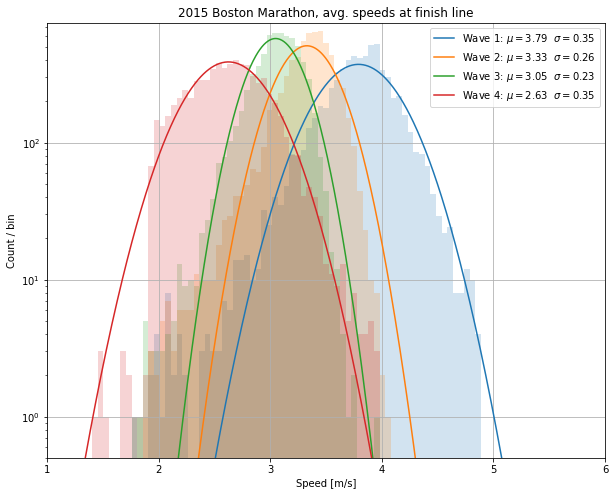

In [180]:
f, ax = plt.subplots(figsize=(10,8))
waves = [1,2,3,4]
y_max = []

color_norm = mpl.colors.BoundaryNorm(np.array([1,2,3,4,5]),4)
cmap = plt.cm.get_cmap('tab10')
#color_norm = mpl.colors.Normalize(vmin=1,vmax=4)
#cmap = plt.cm.get_cmap('viridis')

for idx,wave in enumerate(waves):
    speeds = (42195/df.loc[df['Wave']==wave,'Official Time_sec'])
    bins = np.linspace(1,6,100)
    binwidth = bins[1]-bins[0]
    speeds.hist(bins=bins, alpha=.2, color=cmap(color_norm(wave)))
    x = np.linspace(0,6,1000)
    #y = norm.pdf(x,loc=speeds.mean(),scale=speeds.std()) # method of moments
    loc,scale = norm.fit(speeds.dropna()) # MLEs
    y = norm.pdf(x,loc=loc,scale=scale)
    y_scale = y*speeds.count()*binwidth
    leg_txt = 'Wave %d: $\mu=$%.2f  $\sigma=$%.2f ' % (wave,loc,scale)
    ax.plot(x,y_scale,color=cmap(color_norm(wave)),label=leg_txt)
    y_max.append(np.max(y_scale))

ax.set_yscale('log')
ax.set_ylim([.5,1.3*np.max(y_max)])
ax.set_xlim([1,6])
ax.legend()
ax.set_title('2015 Boston Marathon, avg. speeds at finish line')
ax.set_xlabel('Speed [m/s]')
ax.set_ylabel('Count / bin')

In [230]:
speeds=(5000/df.loc[df['Wave']==3,'5K_sec']).dropna()
#speeds = (42195/df.loc[df['Wave']==3,'Official Time_sec'])
speeds.sort_values(inplace=True)
closest_neighbor = pd.DataFrame({'before':speeds.diff(periods=1).abs(),'after':speeds.diff(periods=-1).abs()}).min(axis=1)
farthest_neighbor = pd.DataFrame({'before':speeds.diff(periods=1).abs(),'after':speeds.diff(periods=-1).abs()}).max(axis=1)

(-0.001, 0.02)

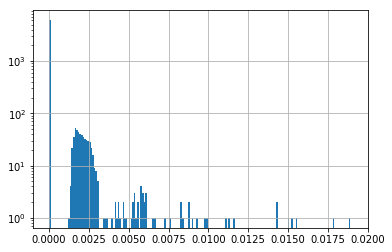

In [231]:
bins = np.linspace(0,.02,200)
#closest_neighbor.hist(bins=bins)
speeds.diff(periods=1).abs().hist(bins=bins)
plt.gca().set_yscale('log')
plt.gca().set_xlim([-0.001,.02])

(-0.001, 0.02)

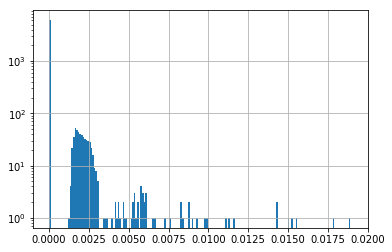

In [232]:
speeds.diff(periods=-1).abs().hist(bins=bins)
plt.gca().set_yscale('log')
plt.gca().set_xlim([-0.001,.02])

In [217]:
speeds

26577    1.898614
26585    1.904399
26288    2.152389
26454    2.215330
25482    2.274795
25773    2.282063
26137    2.321802
25889    2.343018
24151    2.381519
26187    2.396358
25160    2.402114
25159    2.402114
21956    2.414293
26096    2.420136
25520    2.421308
24595    2.433090
25428    2.443196
25663    2.444390
24258    2.455796
23973    2.457606
23357    2.470966
25645    2.473411
26401    2.478315
25358    2.483238
26019    2.488181
24800    2.505010
25746    2.506266
26576    2.506894
24725    2.506894
24270    2.519526
           ...   
11053    3.711952
6165     3.725782
13501    3.729952
9820     3.732736
8473     3.735525
7576     3.736921
5503     3.736921
5754     3.741115
13271    3.746722
7534     3.746722
11237    3.750938
9389     3.753754
5726     3.763643
12153    3.766478
4950     3.766478
13959    3.777862
5746     3.792188
7981     3.812429
7267     3.822630
2149     3.822630
6015     3.827019
8911     3.852080
19636    3.858025
10129    3.859514
5413     3

In [220]:
df_diffs = pd.DataFrame({'before':speeds.diff(periods=1).abs(),'after':speeds.diff(periods=-1).abs()})
df_diffs.query('before == 0')

,after,before
25159,0.012179,0.0
24725,0.012632,0.0
24055,0.005344,0.0
22408,0.005366,0.0
25175,0.012970,0.0
21913,0.009772,0.0
23510,0.000000,0.0
25151,0.002103,0.0
24382,0.003513,0.0
25489,0.003551,0.0


In [226]:
speeds.value_counts()[speeds.value_counts()>1].sum()

6410